# JuSpyce API test: null maps generation & permutation test

In [1]:
import sys
import os
from glob import glob
import pathlib
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# current path
wd = pathlib.Path().resolve().parent
print(wd)

# import juspyce
sys.path.append(os.path.dirname(os.path.join(wd, "juspyce")))
from juspyce.api import JuSpyce
from juspyce.stats import *
from juspyce.utils import *

/Users/llotter/projects/juspyce


## Load JuSpyce data from test_juspyce.fit.ipynb

In [75]:
juspyce_vol = JuSpyce.from_pickle(os.path.join(wd, "testing", "test_juspyce_vol.pkl.gz"))

# run dominance analyses as preparation
_ = juspyce_vol.predict(
    method="dominance",
    adjust_r2=True
)

INFO:juspyce.api:Loaded complete object from /Users/llotter/projects/juspyce/testing/test_juspyce_vol.pkl.gz.


Predicting (dominance, 8 proc):   0%|          | 0/28 [00:00<?, ?it/s]

## Permutation based on null maps

Uses the method from brainsmash based on variograms to correct for spatial autocorrelation. Distance maps are based on geodesic distances for surface parcellations and euclidean distances for volumetric parcellations.

One has to choose a method for which empirical p-values will be calculated. If the `JuSpyce.permute_maps()` method is then applied again for computation of another metric, the already existing null maps will be used (this behavior can be turned off).

In [79]:
# everything below that is set to None will be set to customs or taken from the .fit() method
_ = juspyce_vol.permute_maps(
    method="dominance", # which method
    comparison=None, # use dataframe from .compare() function
    permute="X", # null maps for which dataset? Can be 'X' or 'Y'
    null_method="variogram", # "variogram" -> brainsmash, "random" -> np.random
    null_maps=None, # directly provide null maps. Must be dict with keys corresponding to the maps
                    # for which null data is generated (e.g., "mGluR5" or so)
    use_null_maps=True, # re-use null maps if already computed for another prediction method
    dist_mat=None, # custom distance matrix -> must be ndarray with shape (n_parcels, n_parcels) 
                   # or tuple of those ndarrays if parcellation is tuple of giftis
    n_perm=1000, # number of permutations (= number of null maps)
    parcellation=None, parc_space=None, parc_hemi=None, # parcellation data, usually set at .fit()
    centroids=False, # compute distance matrices between parcel centroids? -> faster
    r_to_z=True, adjust_r2=True, mlr_individual=True, # settings for prediction (see other notebook)
    p_tail=None, # which-sided p-value? Must be dict with e.g. 
                 # {"spearman":"two"} or 
                 # {"dominance_total":"upper", "dominance_relative":"upper", 
                 #  "dominance_full_r2":"upper", "dominance_individual":"upper"}, etc.
    n_proc=None, # number of processes
    n_proc_predict=1, # number of processes for prediction method -> multiplies itself with n_proc!
    seed=None, # seed for reproducability
    store=True
)

INFO:juspyce.api:Running 'true' prediction (method = 'dominance').


Predicting (dominance, 8 proc):   0%|          | 0/28 [00:00<?, ?it/s]

INFO:juspyce.api:No null maps found.
INFO:juspyce.api:Generating null maps for 'X' data (n = 1000, null_method = 'variogram').
INFO:juspyce.nulls:Null map generation: Assuming n = 7 data vector(s) for n = 116 parcels.
INFO:juspyce.nulls:Loaded parcellation (parc_space = 'MNI152').
INFO:juspyce.nulls:Calculating distance matrix/matrices (euclidean).
/Users/llotter/opt/anaconda3/envs/juspyce/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Generating null maps (8 proc):   0%|          | 0/7 [00:00<?, ?it/s]

Null predictions (dominance, 8 proc):   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:juspyce.api:Calculating exact p-values (tails = {'dominance_total': 'upper', 'dominance_individual': 'upper', 'dominance_relative': 'upper', 'dominance_full_r2': 'upper'}).


### Print result

All results are stored in a dict as `JuSpyce.p_predictions["prediction_name"]` which corresponds to `JuSpyce.predictions["prediction_name"]`

In [80]:
for dom in ["dominance_full_r2", "dominance_relative", "dominance_total", "dominance_individual"]:
    print(dom)
    display(juspyce_vol.p_predictions[dom])

dominance_full_r2


,dominance_full_r2
control,0.005
touch,0.109
interoception,0.051
learning,0.001
attention,0.743
language,0.485
interaction,0.105
inhibition,0.062
somatosensory,0.112
decision,0.001


dominance_relative


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.221,0.689,0.417,0.412,0.275,0.472,0.355
touch,0.263,0.584,0.154,0.417,0.521,0.566,0.316
interoception,0.684,0.230,0.136,0.253,0.649,0.544,0.416
learning,0.441,0.492,0.219,0.416,0.481,0.516,0.172
attention,0.859,0.440,0.661,0.003,0.721,0.904,0.503
language,0.063,0.792,0.287,0.717,0.459,0.392,0.795
interaction,0.562,0.638,0.336,0.032,0.657,0.746,0.672
inhibition,0.205,0.630,0.359,0.464,0.329,0.383,0.402
somatosensory,0.296,0.560,0.118,0.429,0.535,0.599,0.319
decision,0.548,0.597,0.476,0.282,0.468,0.218,0.180


dominance_total


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.050,0.603,0.249,0.279,0.064,0.333,0.167
touch,0.133,0.460,0.035,0.321,0.386,0.555,0.167
interoception,0.674,0.071,0.035,0.114,0.612,0.577,0.275
learning,0.038,0.086,0.001,0.158,0.057,0.429,0.001
attention,0.858,0.491,0.677,0.007,0.732,0.881,0.531
language,0.063,0.795,0.248,0.693,0.435,0.383,0.806
interaction,0.456,0.548,0.220,0.001,0.628,0.826,0.661
inhibition,0.066,0.538,0.212,0.366,0.167,0.256,0.271
somatosensory,0.165,0.435,0.021,0.326,0.409,0.606,0.179
decision,0.204,0.321,0.196,0.005,0.047,0.001,0.001


dominance_individual


,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.038,0.738,0.182,0.626,0.040,0.844,0.941
touch,0.339,0.487,0.417,0.509,0.700,0.460,0.436
interoception,0.684,0.027,0.048,0.022,0.937,0.639,0.133
learning,0.001,0.003,0.001,0.026,0.001,0.724,0.001
attention,0.686,0.358,0.801,0.015,0.743,0.832,0.386
language,0.140,0.732,0.229,0.830,0.666,0.341,0.810
interaction,0.545,0.981,0.146,0.006,0.926,0.737,0.718
inhibition,0.086,0.634,0.631,0.740,0.166,0.566,0.994
somatosensory,0.438,0.445,0.272,0.520,0.809,0.519,0.410
decision,0.017,0.225,0.338,0.001,0.001,0.001,0.001


#### Normal distribution p values

In addition to the exact p values, JuSpyce computes p values after fitting a Gaussian distribution to the null prediction arrays. These are stored as `JuSpyce.p_predictions["prediction_name-norm"]` and may be useful if one wants to rank very small p values. Using these might influence the outcome of some multiple comparison correction methods.

In [81]:
# for example, rounded to 6 digits:
pd.concat([
    juspyce_vol.p_predictions["dominance_full_r2"].rename(columns={"dominance_full_r2": "Full R2 exact p"}), 
    juspyce_vol.p_predictions["dominance_full_r2-norm"].rename(columns={"dominance_full_r2": "Full R2 Gaussian p"}).round(6)
], axis=1)

,Full R2 exact p,Full R2 Gaussian p
control,0.005,0.004714
touch,0.109,0.105119
interoception,0.051,0.043071
learning,0.001,0.000000
attention,0.743,0.730394
language,0.485,0.499812
interaction,0.105,0.096312
inhibition,0.062,0.059638
somatosensory,0.112,0.104586
decision,0.001,0.000000


### Show null distributions

Null prediction results are stored in nested dictionaries in the JuSpyce object.

dict_keys(['permute', 'n_perm', 'null_method', 'null_maps', 'distance_matrix', 'predictions-dominance'])
All iterations: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195

,control,touch,interoception,learning,attention,language,interaction,inhibition,somatosensory,decision,...,fear,perception,cognition,reward,mirror,orientation,movement,default_mode,dopamine,pain
0,0.303510,0.145771,0.038273,0.284950,0.405668,0.129883,0.122307,0.312988,0.157789,0.165273,...,0.190010,0.291107,0.127817,0.205155,0.404020,0.345557,0.283739,0.126638,0.247039,0.071307
1,0.117426,0.158168,0.043247,0.152726,0.320428,0.218160,0.294978,0.185893,0.166088,0.069614,...,0.089658,0.350380,0.157397,0.134776,0.296678,0.256135,0.151435,0.047994,0.201722,-0.013628
2,0.215269,0.212314,0.163168,0.109370,0.365005,0.048479,0.096160,0.194544,0.219837,0.008500,...,0.072443,0.205472,0.144956,0.085428,0.344930,0.250659,0.233346,-0.001599,0.180357,0.109448
3,0.258848,0.161466,0.094998,-0.008140,0.240315,0.108755,0.065918,0.269245,0.165046,0.054867,...,0.032641,0.384629,0.037335,0.064920,0.268794,0.391997,0.263841,-0.005523,0.139671,0.071618
4,0.154862,0.114770,0.101676,0.083896,0.260491,0.153674,-0.001321,0.178619,0.122140,0.047298,...,0.099300,0.080688,0.069611,0.081163,0.403250,0.254398,0.282335,0.053427,0.090798,0.000341


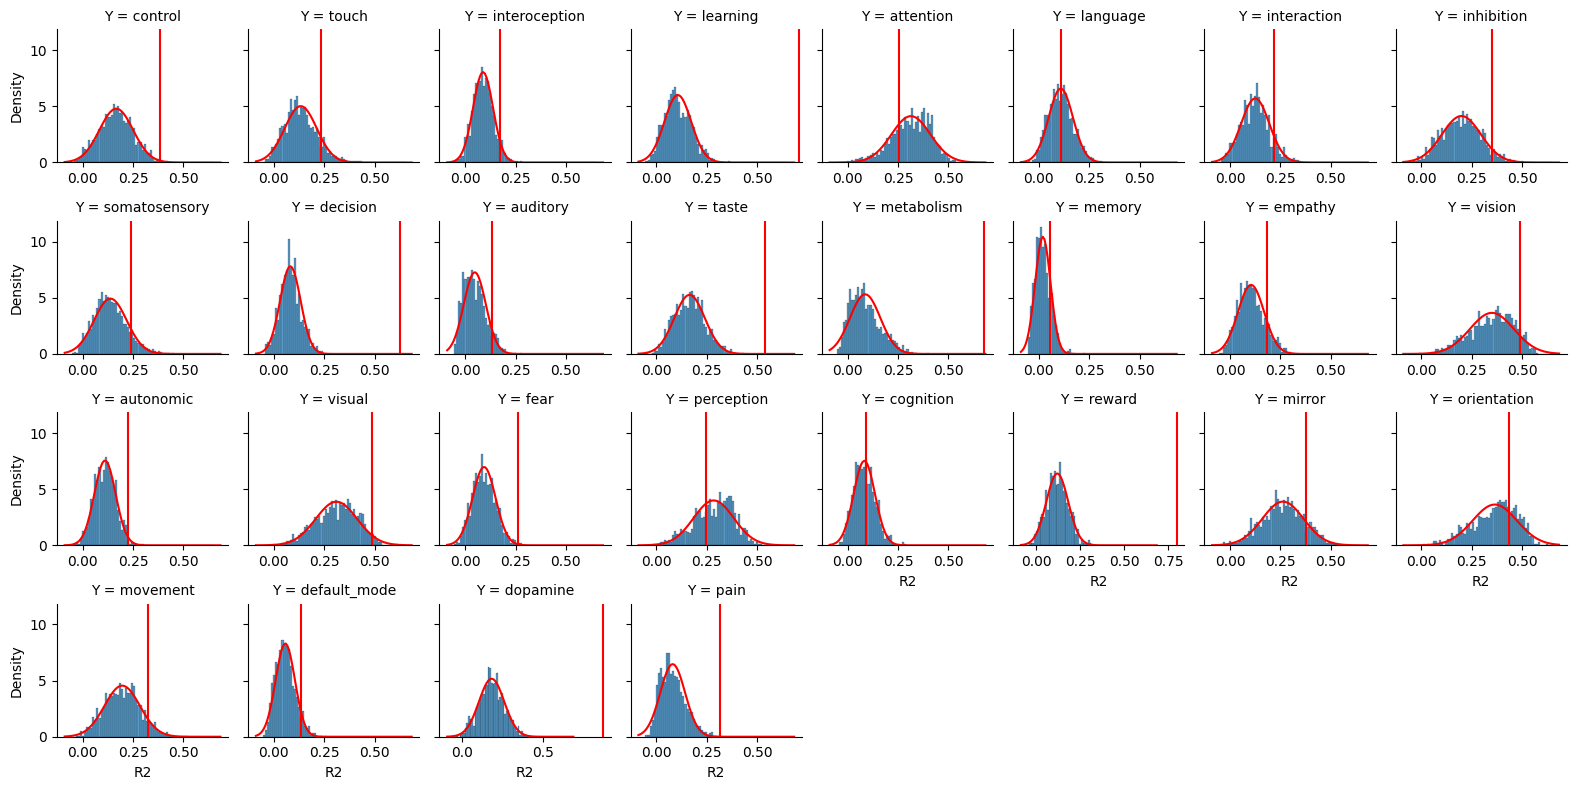

In [84]:
print(juspyce_vol.nulls.keys())
print("All iterations:", juspyce_vol.nulls["predictions-dominance"].keys())
print("One iteration:", juspyce_vol.nulls["predictions-dominance"][0].keys())
print("df with prediction result from one iteration:", juspyce_vol.nulls["predictions-dominance"][0]["dominance_full_r2"].shape)

# collect full r2 null data
full_r2_null = pd.DataFrame(
    np.concatenate([juspyce_vol.nulls["predictions-dominance"][i]["dominance_full_r2"] \
        for i in range(1000)], axis=1).T,
    columns=juspyce_vol.y_lab
)
print("Full R^2 null data:")
display(full_r2_null.head(5))

# plot as histogram    
hist = sns.displot(full_r2_null.melt(value_name="R2", var_name="Y"), 
                   x="R2", col="Y", col_wrap=8, height=2, facet_kws=dict(sharex=False),
                   stat="density", common_norm=False)
# plot normal distributions and true values
for i,y in enumerate(full_r2_null.columns):
    mu, sd = norm.fit(full_r2_null[y])
    x0, x1 = hist.axes[i].get_xlim()
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf, mu, sd)
    hist.axes[i].plot(x_pdf, y_pdf, c="r")
    hist.axes[i].axvline(juspyce_vol.predictions["dominance_full_r2"].loc[y].values[0], c="r")

## Correct p-values

p values can be corrected across dataframes or rows/columns of dataframes using `JuSpyce.correct_p()`. The method will, if not provided differently, loop over all p-value dataframes and apply multiple comparison correction methods from `statsmodels.stats.multitest.multipletests`.

Results will be stored in the `JuSpyce.p_predictions` dict as `JuSpyce.p_predictions["prediction_name--correction_method"]`, e.g., if method is `spearman` and correction is `fdr_bh:` `juspyce_vol.p_predictions["spearman--fdr_bh"]`

In [5]:
juspyce_vol.correct_p(
    analysis="predictions", # one of "predictions" or "comparisons" -> here: predictions
    method="all", # if all, iterate over all dataframes (but calculate values for each individual dataframe)
    mc_alpha=0.05, # alpha treshold, should have no effect
    mc_method="fdr_bh", # correction method passed to statsmodels
    mc_dimension="array") # 'array', 'row' or 'column'
display(juspyce_vol.p_predictions["dominance_total--fdr_bh"])

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
control,0.248585,0.723506,0.518311,0.518707,0.320000,0.586310,0.397600
touch,0.392000,0.662014,0.196000,0.529730,0.631024,0.714089,0.416810
interoception,0.757120,0.300837,0.133280,0.392000,0.725080,0.717850,0.529730
learning,0.182483,0.320000,0.019600,0.376923,0.326667,0.662014,0.019600
attention,0.860563,0.691841,0.757120,0.088200,0.793692,0.885000,0.691841
language,0.248585,0.826151,0.528830,0.758674,0.647584,0.649732,0.844791
interaction,0.662014,0.691841,0.515326,0.019600,0.723506,0.860563,0.758386
inhibition,0.320000,0.704575,0.515326,0.594701,0.416810,0.518707,0.518707
somatosensory,0.420683,0.662014,0.150769,0.529730,0.649732,0.726982,0.420683
decision,0.462651,0.528830,0.458871,0.069176,0.218400,0.019600,0.019600


## Use "comparison" Y data

In [6]:
# groups
n_Y = juspyce_vol.Y.shape[0]
groups = [0] * int(n_Y/2) + [1] * int(n_Y/2)
print(n_Y, groups)

28 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
# apply comparison
juspyce_vol.compare(
    comparison="diff(mean(A),mean(B))",
    groups=groups
)
# run prediction & permutation
_ = juspyce_vol.permute_maps(
    method="spearman",
    comparison="diff(mean(A),mean(B))", 
    permute="X",
    n_perm=1000,
    store=True)

INFO:juspyce.api:Subtracting parcelwise mean of B from mean of A: new Y = mean(Y[A]) - mean(Y[B]).
INFO:juspyce.api:Running 'true' prediction (method = 'spearman').


Predicting (spearman, 1 proc):   0%|          | 0/1 [00:00<?, ?it/s]

Null predictions (spearman, 8 proc):   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:juspyce.api:Calculating exact p-values (tails = '{'spearman': 'two'}').


In [8]:
juspyce_vol.p_predictions["diff(mean(A),mean(B))-spearman"]

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
"diff(mean(A),mean(B))",0.282,0.656,0.712,0.214,0.29,0.67,0.776


In [9]:
juspyce_vol.correct_p(analysis="predictions")
display(juspyce_vol.p_predictions["diff(mean(A),mean(B))-spearman--fdr_bh"])

,5HT2a-cimbi36-29-beliveau2017,NMDA-ge179-29-galovic2021,mGluR5-abp688-73-smart2019,MU-carfentanil-204-kantonen2020,GABAa-flumazenil-6-dukart2018,5HT1b-p943-65-gallezot2010,D2-raclopride-156-malen2022
"diff(mean(A),mean(B))",0.676667,0.776,0.776,0.676667,0.676667,0.776,0.776
